In [23]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, roc_auc_score, confusion_matrix
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from plotnine import *
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


**Clean the data**

In [8]:
heart = pd.read_csv("/Users/alexandra/Desktop/GSB-544/Labs/Lab7/heart_attack.csv")
heart.dropna(inplace=True)
heart.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1


# Part One: Fitting Models
We will use medical data to predict the likelihood of a person experiencing an exercise-induced heart attack.

### KNN

In [18]:
#define x and y
X = heart.drop(columns=['output'])  
y = heart['output'] 

In [22]:
ct = ColumnTransformer(
    [
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

knn_model1 = Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsClassifier())]  
    
).set_output(transform="pandas")


#find best neighbors
param_grid1 = {
    'knn__n_neighbors': np.arange(1, 100) 
}

#gridsearch
grid_search = GridSearchCV(knn_model1, param_grid1, cv=5, scoring='roc_auc', n_jobs=-1)

# fit data
grid_search.fit(X, y)

best_knn = grid_search.best_estimator_
best_roc_auc = grid_search.best_score_
best_k = grid_search.best_params_['knn__n_neighbors']

# Report the best ROC AUC score from cross-validation
print(f"Best ROC AUC from Cross-Validation: {best_roc_auc:.4f}")
print(f"Best k (number of neighbors): {best_k}")



Best ROC AUC from Cross-Validation: 0.8507
Best k (number of neighbors): 54
Best ROC AUC from Cross-Validation: 0.8507
Best k (number of neighbors): 54


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast


The best ROC AUC from Ccross validation is 0.8507, which means that the model has an 85.07% chance of predicting if the person will have a heart attack. This is pretty good. I got this with a model that had 54 neighbors.

,not at risk,at risk
not at risk,94,33
at risk,24,122


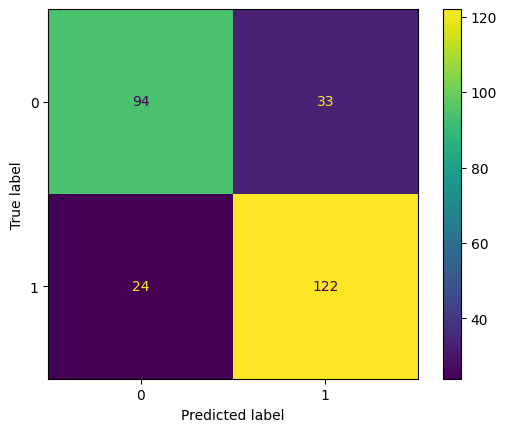

In [31]:
y_pred_knn = best_knn.predict(X)  

#matrix
cm1= confusion_matrix(y, y_pred_knn)
cm1
ConfusionMatrixDisplay(cm1).plot()

class_names = ["not at risk", "at risk"]
conf_matrix_knn = pd.DataFrame(cm1, index=class_names, columns=class_names)
conf_matrix_knn


## Q2: Logistic Regression

In [ ]:
ct = ColumnTransformer(
    [
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

knn_model1 = Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsClassifier())]  
    
).set_output(transform="pandas")


#find best neighbors
param_grid1 = {
    'knn__n_neighbors': np.arange(1, 100) 
}

#gridsearch
grid_search = GridSearchCV(knn_model1, param_grid1, cv=5, scoring='roc_auc', n_jobs=-1)

# fit data
grid_search.fit(X, y)

best_knn = grid_search.best_estimator_
best_roc_auc = grid_search.best_score_
best_k = grid_search.best_params_['knn__n_neighbors']

# Report the best ROC AUC score from cross-validation
print(f"Best ROC AUC from Cross-Validation: {best_roc_auc:.4f}")
print(f"Best k (number of neighbors): {best_k}")

